In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential #modeli sequential yapacağız
from keras.layers import Dense, LSTM, Dropout #kullanacağımız modeller

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/data"

In [4]:
%cd /content/gdrive/My Drive/data

/content/gdrive/My Drive/data


In [5]:
!kaggle datasets download -d tosinabase/intel-stock-prices-historical-data-intc

401 - Unauthorized


In [6]:
!unzip \*.zip && *.zip

Archive:  archive.zip
replace INTC.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: INTC.csv                
/bin/bash: archive.zip: command not found


In [7]:
df = pd.read_csv(
  "INTC.csv",
  parse_dates=['Date'], 
  index_col="Date"
)

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.325521,0.330729,0.325521,0.325521,0.199557,10924800
1980-03-18,0.325521,0.328125,0.322917,0.322917,0.197961,17068800
1980-03-19,0.330729,0.335938,0.330729,0.330729,0.202750,18508800
1980-03-20,0.330729,0.334635,0.329427,0.329427,0.201952,11174400
1980-03-21,0.322917,0.322917,0.317708,0.317708,0.194767,12172800


In [9]:
sns.set(style='whitegrid', palette='deep', font_scale=1.3)
mpl.rcParams['figure.figsize'] = 18,8

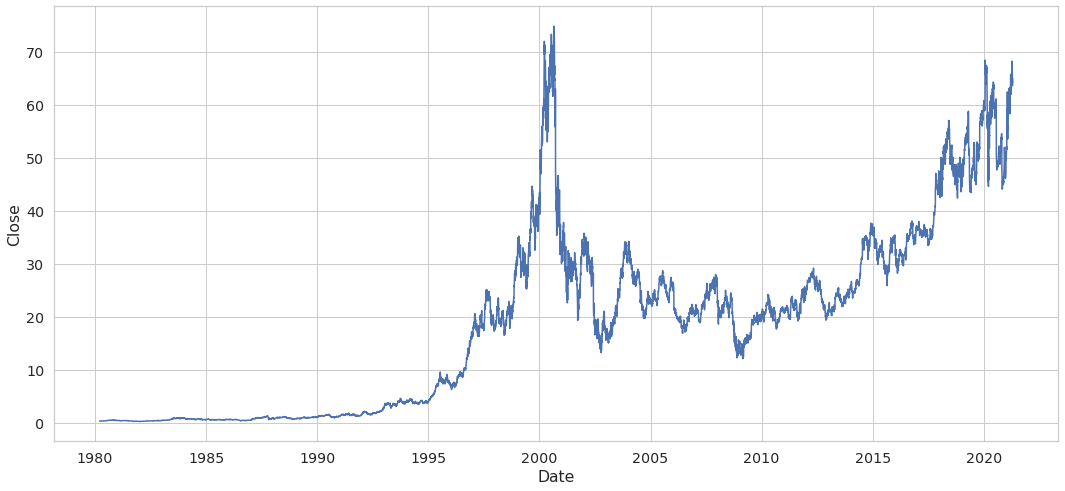

In [10]:
sns.lineplot(x=df.index, y="Close", data=df); ###############################ekle

In [11]:
print(len(df.index.year))

10361


In [12]:
train_size = int(len(df) * 0.8)
#verinin %80'inini eğitim için, kalan %20'sini test için ayırıyoruz.
test_size = len(df) - train_size
train = df[0:train_size]
test = df[train_size:len(df)]
print ("Train Shape:", train.shape,
       "\nTest Shape:", test.shape)

Train Shape: (8288, 6) 
Test Shape: (2073, 6)


In [13]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
from sklearn.preprocessing import StandardScaler

columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

#creating scaler

fscaler = StandardScaler()
scaler = StandardScaler()

#fit scaler on train data

fscaler = fscaler.fit(train[columns].to_numpy())

train.loc[:, columns] = fscaler.transform(train[columns].to_numpy())

#apply transform on fitted train data

train['Close'] =  scaler.fit(train[['Close']]).transform(train[['Close']])

#fit scaler on test data

test.loc[:, columns] = fscaler.transform(test[columns].to_numpy())

#apply transform on fitted test data

test['Close'] =  scaler.fit(train[['Close']]).transform(test[['Close']])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [15]:
df.shape

(10361, 6)

In [16]:
#### Train Data ####
time_steps = 14
train_x = []
train_y = []
for i in range(len(train) - time_steps):

  train_x.append(train.iloc[i:(i + time_steps)].values)
  train_y.append((train.Close).iloc[i + time_steps])

train_x = np.array(train_x)
train_y = np.array(train_y)



In [17]:
####### Test Data #######

test_x = []
test_y = []
for i in range(len(test) - time_steps):

  test_x.append(test.iloc[i:(i + time_steps)].values)
  test_y.append((test.Close).iloc[i + time_steps])

test_x = np.array(test_x)
test_y = np.array(test_y)

In [18]:
df.shape

(10361, 6)

In [19]:
print("Shape of train_x: ", train_x.shape, "\nShape of train_y: ", train_y.shape,
      "\nShape of test_x: ", test_x.shape, "\nShape of test_y:", test_y.shape)

Shape of train_x:  (8274, 14, 6) 
Shape of train_y:  (8274,) 
Shape of test_x:  (2059, 14, 6) 
Shape of test_y: (2059,)


In [20]:
features = 6 

model = Sequential()
model.add(LSTM(units = 5, input_shape=(time_steps, features), return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(24))
model.add(Dense(units=1))


model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.fit(train_x, train_y, 
          epochs=60,  
          verbose=1, 
          validation_split=0.1, 
          shuffle=False) 


Epoch 1/60
233/233 [==============================] - 7s 16ms/step - loss: 0.1989 - accuracy: 0.0000e+00 - val_loss: 0.0139 - val_accuracy: 0.0000e+00
Epoch 2/60
144/233 [=================>............] - ETA: 0s - loss: 0.0662 - accuracy: 0.0000e+00

In [ ]:
##############################################################################################33

In [ ]:
test_prediction = model.predict(test_x)

In [ ]:
plt.plot(np.arange(0, len(train_y)), train_y.flatten(), label="history")

plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), test_y.flatten(), 'g', label="true")

plt.plot(np.arange(len(train_y), len(train_y) + len(test_y)), test_prediction.flatten(), 'r', '.', label="prediction")

plt.title("Intel Stock Price Prediction ")
plt.ylabel("Close Price")
plt.xlabel("Time Step")

plt.legend()
plt.show();

In [ ]:

plt.plot(test_y.flatten(),'g', marker='.', label="true")
plt.plot(test_prediction.flatten(), 'r', label="prediction")
plt.title("Intel Stock Price Prediction ")
plt.ylabel("Close Price")
plt.xlabel("Time Step")
plt.legend()
plt.show();